## EE4708: Data Analytics Lab - Mid Semester Examination

### Date: September 30, 2029 
### Duration: 3 hrs
### Max. Marks: 30

### Roll Number : ME17B162

### Instructions:

1) Write your roll number is the cell above. 

2) All questions are to be answered in this jupyter notebook only, including any assumptions and observations. The cells have been provided as needed but you can add new cells if required.

3) There are 3 main questions with multiple sub-questions. The corresponding datasets are to be downloaded from the google drive folder link provided. You have to strictly use the datasets provided in the folder bearing your roll number and evaluation will be based only on that. If you use any other dataset, you will be marked zero.  

4) In the codes, any python packages/functions discussed in the course can be used unless mentioned otherwise in the question. 

5) Any parameters required for using an inbuilt python function may be chosen appropriately.   

6) You are free to use any resources at your disposal (assignments, text books, internet, etc.) but you are strictly forbidden from discussing with other students. There will be harsh penalties if two or more people are found to have submitted exactly the same code.

7) For any doubts during the exam, the TAs will be available continuously between 2 pm and 5 pm on a google meet session to clarify your doubts. Joining this session is optional and only to clarify any doubts. Here is the link to the session: https://meet.google.com/mai-ixxh-jaq

8) The codes are only verified for desired functionality and not for speed/efficiency. 


### Question 1: Linear/Polynomial Regression (10 Marks)

Consider the given regression dataset which has 18 input features (x1 to x18)  and a target variable (y). Write a code in the cells provided to perform the following (1.1 to 1.7) on the given dataset:

1.1) Standardise of Normalise the features if deemed necessary

1.2) Use train_test_split function in sklearn with random_state = 0  to split the dataset into train and validation sets in the ratio of 80:20


In [52]:
# Write your code here
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv('Linear Regression Dataset_58.csv')
ydf = df['y']
xdf = df.iloc[:,1:]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xdf = scaler.fit_transform(xdf)

x_train, x_val, y_train, y_val = train_test_split(xdf, ydf, test_size=0.20, random_state=42)

1.3) Learn polynomial regression models of degrees 1, 2 and 3 and print the R^2 score for all the models

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
r2_val = [0]*3
r2_train = [0]*3
lin1 = LinearRegression().fit(x_train,y_train)
y_pred_val = lin1.predict(x_val)
y_pred_train = lin1.predict(x_train)
r2_val[0] = r2_score(y_val, y_pred_val)
r2_train[0] = r2_score(y_train, y_pred_train)
print('Degree 1 polynomial: R2_Score_Val=',r2_val[0],'R2_Score_train=',r2_train[0])

Degree 1 polynomial: R2_Score_Val= 0.8049740227874455 R2_Score_train= 0.775266390541999


In [62]:
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x_train) 
lin2 = LinearRegression() 
lin2.fit(x_poly, y_train)
y_pred_val = lin2.predict(poly.fit_transform(x_val))
y_pred_train = lin2.predict(x_poly)
r2_val[1] = r2_score(y_val, y_pred_val)
r2_train[1] = r2_score(y_train, y_pred_train)
print('Degree 2 polynomial: R2_Score_Val=',r2_val[1],'R2_Score_train=',r2_train[1])

Degree 2 polynomial: R2_Score_Val= 0.3116604694031462 R2_Score_train= 0.9369173200619142


In [63]:
poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x_train) 
lin3 = LinearRegression() 
lin3.fit(x_poly, y_train)
y_pred_val = lin3.predict(poly.fit_transform(x_val))
y_pred_train = lin3.predict(x_poly)
r2_val[2] = r2_score(y_val, y_pred_val)
r2_train[2] = r2_score(y_train, y_pred_train)
print('Degree 3 polynomial: R2_Score_Val=',r2_val[2],'R2_Score_train=',r2_train[2])

Degree 3 polynomial: R2_Score_Val= -2845.0669869108874 R2_Score_train= 1.0


1.4) **Which among the 3 models would you chose based on the R^2 score and why ? (Write your answer below)**

Degree = 1 gives the best r2_score among all the polynomial regressions for the validation set

1.5) On the above chosen polynomial model, apply L1 regularisation (LASSO) with alpha = 0.01 and print the LASSO model coefficients. 

In [65]:
# Write your code here
from sklearn.linear_model import Lasso
alpha = 0.01
reg = Lasso(alpha = alpha).fit(x_train, y_train)
y_pred_val = reg.predict(x_val)
print('Coefficients:', reg.coef_)
print('R2_Score for the model with Lasso = ', r2_score(y_val, y_pred_val))

Coefficients: [-2.08735977  9.02723413  0.53881063  0.58838488  0.12336002 -0.17188726
  0.81943148 -9.17161338  0.8841626  -0.17086724  0.89736198 -2.60960394
  0.13539656 -0.07397276 -0.07132493 -0.11582592  0.9445148   3.74185877]
R2_Score for the model with Lasso =  0.8033937920816936


d:\extraction\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.815995092445519, tolerance: 8.152507016010158
  model = cd_fast.enet_coordinate_descent(


In [83]:
r2_lasso = r2_score(y_val, y_pred_val)

1.6) Select features from the LASSO model with a coefficient threshold of 0.001. List below the selected features by their label names (i.e, x1,x2,...)


Text(0.5, 1.0, 'Feature importance using Lasso Model')

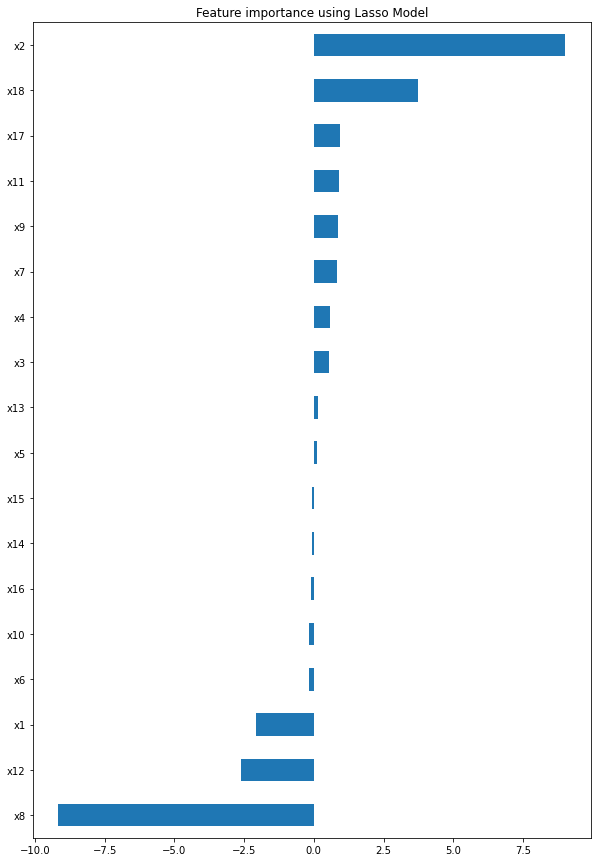

In [70]:
from matplotlib import pyplot as plt
coef = pd.Series(reg.coef_, index = df.columns)

imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (10.0, 15.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [82]:
selecoef = {}
print('Selected Coefficients are:')
for i in range(len(reg.coef_)):
    if abs(coef[i])>0.001:
        print(coef.index[i])
        selecoef[i] = coef.index[i]

Selected Coefficients are:
x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x12
x13
x14
x15
x16
x17
x18


**1.7) With the above chosen features, learn the polynomial regression model of chosen degree (in Q. 1.4) and print the  regression coefficients, mean squared error of predictions on validation set and R^2 score on the validation set.**

As all the values are getting selected, the R2 value will be same as above for the validation set.

In [84]:
print('R2 value:', r2_lasso)
from sklearn.metrics import mean_squared_error
mse = (mean_squared_error(y_pred_val,y_val))
print('MSE:', mse)

R2 value: 0.8033937920816936
MSE: 18.65029705817215


### Question 2: Naive Baye's Classifier (10 Marks)

Consider the given naive bayes classification dataset which has 10 input features (x1 to x10) and a target class (y). The samples come from 3 different classes labelled 0, 1 and 2. Perform the following (2.1 to 2.4) on the given dataset:

2.1) Use train_test_split function in sklearn with random_state = 42  to split the dataset into train and validation sets in the ratio of 80:20


In [244]:
# Write your code here
ndf = pd.read_csv('Naive_Bayes_Dataset_58.csv')
nydf = ndf['y']
nxdf = ndf.iloc[:,:-1]

In [245]:
x_train, x_val, y_train, y_val = train_test_split(nxdf, nydf, test_size=0.20, random_state=42)

In [246]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

2.2) Learn a Gaussian Naive Bayes classifier model from scratch using only functions from math, pandas, numpy and scipy packages (sklearn is not allowed for this step). Using this model, predict the classes of samples in validation set and print the accuracy of predictions.  

In [247]:
from scipy.stats import norm
from numpy import mean
from numpy import std
 
# fit a probability distribution to a univariate data sample
def fit_distribution(data):
    mu = mean(data)
    sigma = std(data)
    dist = norm(mu, sigma)
    return dist

Xy0 = x_train[y_train == 0]
Xy1 = x_train[y_train == 1]
Xy2 = x_train[y_train == 2]

priory=[0]*3
priory[0] = len(Xy0) / len(x_train)
priory[1] = len(Xy1) / len(x_train)
priory[2] = len(Xy2) / len(x_train)

def probability(X, prior, dist):
    mult=1
    for i in range(len(X)):
        mult = mult*(dist[i].pdf(X[i]))
    return prior * mult

dist0 = [1]*10
dist1 = [1]*10
dist2 = [1]*10
for j in range(10):
    dist0[j] = fit_distribution(Xy0.iloc[:, j])

for j in range(10):
    dist1[j] = fit_distribution(Xy1.iloc[:, j])

for j in range(10):
    dist2[j] = fit_distribution(Xy2.iloc[:, j])

In [248]:
x_val = x_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

In [249]:
probab = [1]*3
y_pred = [0]*len(y_val)
for i in range(len(x_val)):
    probab[0] = probability(x_val.loc[i], priory[0], dist0)
    probab[1] = probability(x_val.loc[i], priory[1], dist1)
    probab[2] = probability(x_val.loc[i], priory[2], dist2)
    j = np.argmax(probab)
    y_pred[i] = j

In [250]:
no=0
for i in range(len(y_pred)):
    if y_pred[i] == y_val[i]:
        no = no + 1

In [251]:
print('Accuracy:',no/len(y_val))

Accuracy: 0.725


In [239]:
x_val

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,-1.628857,3.613736,-2.247474,-3.336645,-3.234661,-2.175263,-0.937942,1.746681,6.313793,2.788432
1,-2.930488,1.162622,2.012833,1.117999,-1.783586,1.906466,-2.498571,-0.919379,-1.098054,1.744562
2,1.212778,1.027839,-2.402443,1.793015,-0.693602,0.584886,0.169718,-0.755118,0.832326,-0.257555
3,-1.337493,1.981413,-0.938692,0.837404,-1.440422,0.024054,2.303240,-1.383216,-0.455948,-2.321020
4,4.096634,-0.114817,0.462858,-0.107477,-1.245906,-3.387906,1.544095,3.989179,2.937811,-0.051057
...,...,...,...,...,...,...,...,...,...,...
195,1.984588,-0.726964,-0.667696,1.969549,-0.748456,0.320599,-0.797465,-0.207907,1.388035,2.598036
196,1.430330,0.469493,-1.313591,0.059737,1.112091,-1.366849,-0.318512,-0.090298,-0.542433,-0.503240
197,-0.113385,-0.073032,2.021739,1.525700,2.053993,-2.381351,-2.154606,-2.790696,-5.378306,1.639405
198,1.368947,-0.015054,1.828359,2.915308,1.796170,-2.597412,-2.053663,-2.446176,-5.571505,1.365719


2.3) Perform Feature selection as mentioned in the following steps 2.3.1 to 2.3.4: 

2.3.1) For each feature $x_i$, plot the three gaussian curves of $P(x_i| y=0) , P(x_i | y=1)$ and $P(x_i | y=2)$ using the mean and variance calculated while building the naive bayes model. Ensure that all the plots are labelled properly. There should be 10 plots pertaining to 10 features with each plot having 3 gaussian curves corresponding to 3 classes. 
 


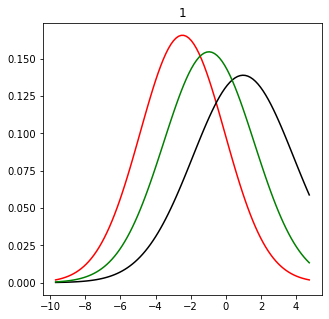

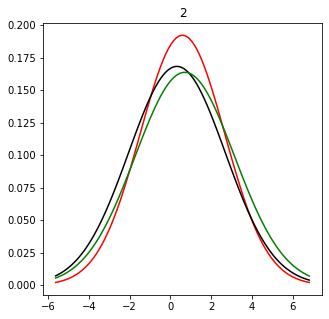

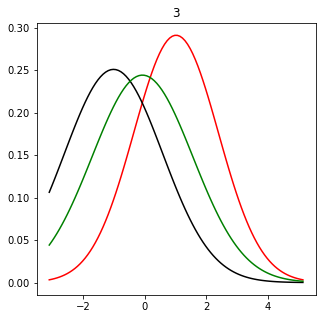

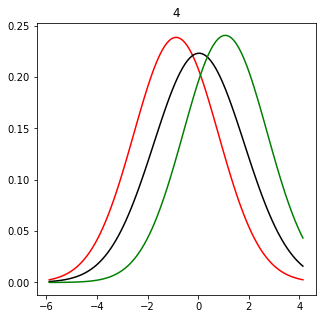

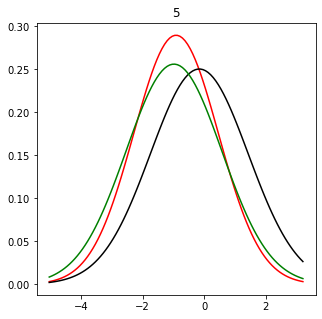

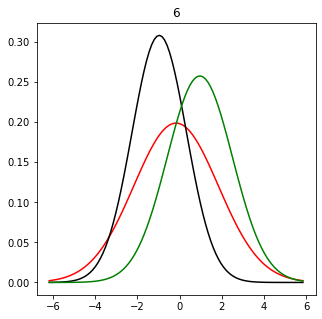

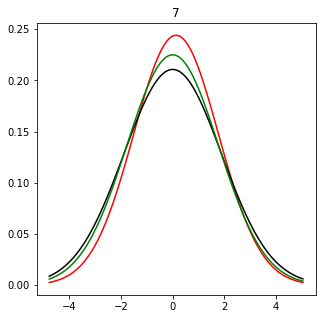

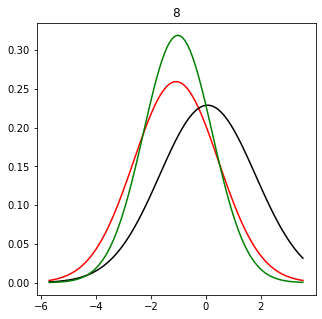

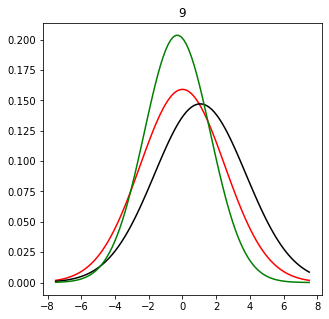

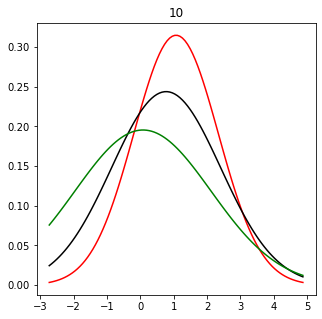

In [252]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
for i in range(10):
    x0 = Xy0.iloc[:, i]
    mu0 = mean(x0)
    sigma0 = std(x0)
    x1 = Xy1.iloc[:, i]
    mu1 = mean(x1)
    sigma1 = std(x1)
    x2 = Xy2.iloc[:, i]
    mu2 = mean(x2)
    sigma2 = std(x2)
    x = np.linspace(mu0 - 3*sigma0, mu0 + 3*sigma0, 100)
    plt.plot(x, stats.norm.pdf(x, mu0, sigma0), color='r')
    plt.plot(x, stats.norm.pdf(x, mu1, sigma1), color='black')
    plt.plot(x, stats.norm.pdf(x, mu2, sigma2), color='green')
    plt.title(i+1)
    plt.show()

2.3.2) Among the 10 plots, observe the ones with significant overlapping gaussian curves. It indicates that the particular feature is not well separated across classes and is not much relevant in predicting the class using bayes rule. Remove the features one by one starting with most significant overlap as observed in the plots and build a naive bayes model with the rest of the features. Find the accuracy of model predictions on the validation set. Continue removing features as long as  the accuracy of prediction on the validation set improves, otherwise stop. 

x2,x5,x7 have significant overlap. So we can remove thenm

In [253]:
# Write your code here
del x_train['x2']
del x_train['x7']

del x_val['x2']
del x_val['x7']

Accuracy: 0.725


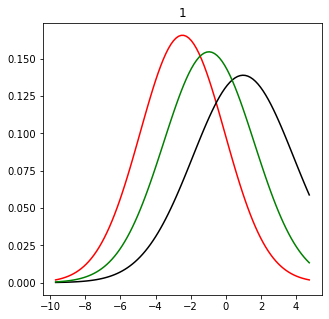

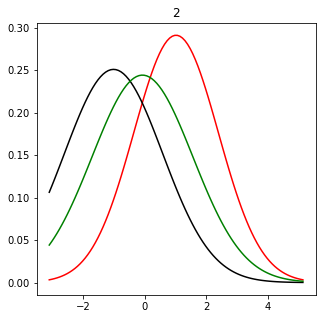

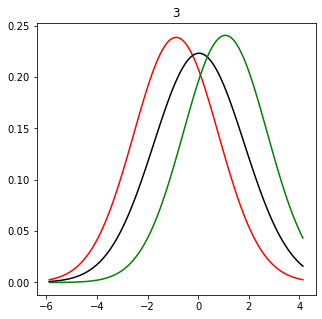

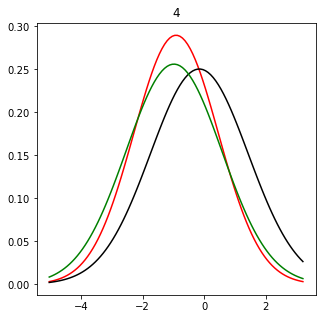

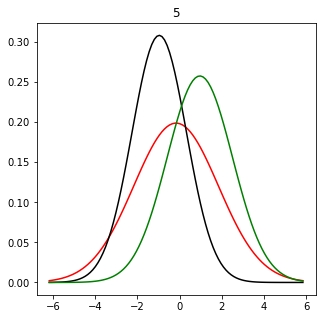

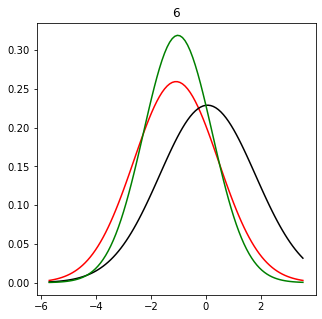

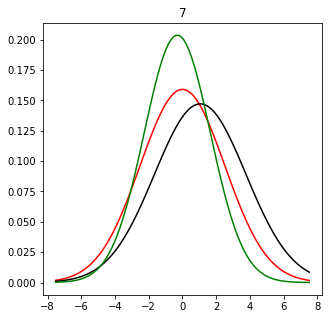

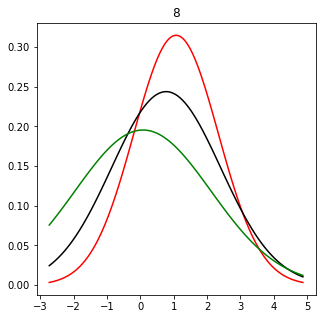

In [254]:
def fit_distribution(data):
    mu = mean(data)
    sigma = std(data)
    dist = norm(mu, sigma)
    return dist

Xy0 = x_train[y_train == 0]
Xy1 = x_train[y_train == 1]
Xy2 = x_train[y_train == 2]

priory=[0]*3
priory[0] = len(Xy0) / len(x_train)
priory[1] = len(Xy1) / len(x_train)
priory[2] = len(Xy2) / len(x_train)

def probability(X, prior, dist):
    mult=1
    for i in range(len(X)):
        mult = mult*(dist[i].pdf(X[i]))
    return prior * mult

dim = x_val.shape[1]
dist0 = [1]*dim
dist1 = [1]*dim
dist2 = [1]*dim
for j in range(dim):
    dist0[j] = fit_distribution(Xy0.iloc[:, j])

for j in range(dim):
    dist1[j] = fit_distribution(Xy1.iloc[:, j])

for j in range(dim):
    dist2[j] = fit_distribution(Xy2.iloc[:, j])
    
probab = [1]*3
y_pred = [0]*len(y_val)
for i in range(len(x_val)):
    probab[0] = probability(x_val.loc[i], priory[0], dist0)
    probab[1] = probability(x_val.loc[i], priory[1], dist1)
    probab[2] = probability(x_val.loc[i], priory[2], dist2)
    j = np.argmax(probab)
    y_pred[i] = j
    
no=0
for i in range(len(y_pred)):
    if y_pred[i] == y_val[i]:
        no = no + 1
        no/len(y_val)
print('Accuracy:',no/len(y_val))

for i in range(dim):
    x0 = Xy0.iloc[:, i]
    mu0 = mean(x0)
    sigma0 = std(x0)
    x1 = Xy1.iloc[:, i]
    mu1 = mean(x1)
    sigma1 = std(x1)
    x2 = Xy2.iloc[:, i]
    mu2 = mean(x2)
    sigma2 = std(x2)
    x = np.linspace(mu0 - 3*sigma0, mu0 + 3*sigma0, 100)
    plt.plot(x, stats.norm.pdf(x, mu0, sigma0), color='r')
    plt.plot(x, stats.norm.pdf(x, mu1, sigma1), color='black')
    plt.plot(x, stats.norm.pdf(x, mu2, sigma2), color='green')
    plt.title(i+1)
    plt.show()

2.3.3) List below the selected and removed features by their label names (i.e, x1,x2,...)

2.3.4) Plot a curve (properly labelled) with the validation set accuracy on y-axis and number of features on x-axis as varied in 2.3.2 

2.4) Based on the naive bayes model with selected features, print the accuracy of predictions on the validation set.

In [33]:
# Write your code here


### Question 3: Logistic Regression Classifier (10 Marks)

Consider the given logistic regression dataset which has 9 input features (x1 to x9)  and a target class (y). The samples come from 2 different classes labelled 0 and 1. Perform the following on the given dataset:

3.1) There are two categorical features (x5 and x6) in the dataset. Encode these features appropriately. Mention as a comment how the encoding is being performed.

3.2) Standardise of Normalise the features if deemed necessary

3.3) Use train_test_split function in sklearn with random_state = 0  to split the dataset into train and validation sets in the ratio of 80:20

In [169]:
# Write your code here
ldf = pd.read_csv('Logistic Regression Dataset_58.csv')
ldf

,x1,x2,x3,x4,x5,x6,x7,x8,x9,y
0,40,1,37.0,1,1-2 Year,No,50806.0,156.0,16,0
1,50,1,12.0,0,1-2 Year,Yes,34656.0,124.0,182,0
2,47,1,28.0,1,1-2 Year,No,51590.0,124.0,98,0
3,44,1,28.0,0,> 2 Years,Yes,45383.0,124.0,221,1
4,56,1,30.0,0,> 2 Years,Yes,38527.0,124.0,218,0
...,...,...,...,...,...,...,...,...,...,...
7618,51,1,28.0,1,1-2 Year,No,27899.0,26.0,258,0
7619,42,1,28.0,0,< 1 Year,No,2630.0,1.0,263,0
7620,23,1,47.0,1,< 1 Year,No,37611.0,152.0,153,0
7621,68,1,10.0,1,1-2 Year,No,24653.0,152.0,162,0


In [170]:
ldf['x5'].unique()

array(['1-2 Year', '> 2 Years', '< 1 Year'], dtype=object)

In [171]:
def label_x5(col):
    encoding = {'< 1 Year':0, '1-2 Year':1, '> 2 Years':2}
    ldf_labeled = col.replace(encoding)
    return ldf_labeled

def label_x6(col):
    encoding = {'No':0, 'Yes':1}
    ldf_labeled = col.replace(encoding)
    return ldf_labeled

ldf['x5'] = label_x5(ldf['x5'])
ldf['x6'] = label_x6(ldf['x6'])

In [173]:
xdf = scaler.fit_transform(ldf[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9']])

In [175]:
x_train, x_val, y_train, y_val = train_test_split(xdf, ldf['y'], test_size=0.20, random_state=42)

3.4) Learn a logistic regression model for classification and print the accuracy of the model in predicting the classes of the samples in the validation set. 

In [177]:
# Write your code here
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_train, y_train)

acc = reg.score(x_val,y_val)
print('Accuracy:', acc)

Accuracy: 0.8767213114754099


3.5) Perform feature selection using ‘RFE’ function (Recursive Feature Elimination) in sklearn and using the function argument, vary the number of features to be selected until the model prediction accuracy obtained on validation set is best possible. Print the best possible accuracy that is obtained.  

In [180]:
# Write your code here
from sklearn.feature_selection import RFE
score=[]
for feat_no in range(1,10):
    est = LogisticRegression()
    select = RFE(est, n_features_to_select=feat_no)
    select = select.fit(x_train, y_train)
    acc = select.score(x_val,y_val)
    score.append(acc)

print('Best score:', np.max(score), 'for features_no =',np.argmax(score)+1)

Best score: 0.8786885245901639 for features_no = 1


3.6) List the features that were selected and eliminated by their label names (i.e, x1,x2,...).

In [183]:
est = LogisticRegression()
select = RFE(est, n_features_to_select=1)
select = select.fit(x_train, y_train)
select.get_support()

array([False, False, False,  True, False, False, False, False, False])

Thus we can see feature **x4** is selected

Eliminated features: x1,x2,x3,x5,x6,x7,x8,x9

3.7) Plot a curve (properly labelled) with the validation set accuracy on y-axis and number of features on x-axis as varied in step 3.5

Text(0, 0.5, 'Validation accuracy')

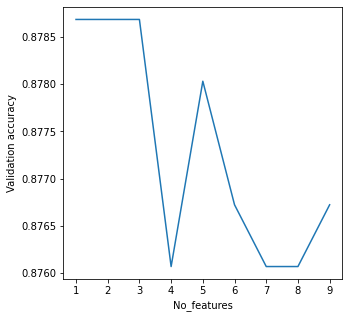

In [186]:
# Write your code here
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.plot(range(1,10),score)
plt.xlabel('No_features')
plt.ylabel('Validation accuracy')

3.8) For the given dataset, give your observations as to what happens with and without standardisation or normalisation of input features. Your observations can be based on above obtained results. You can also run any other code you like to give your observations. 

We standardized above, now lets see without standardization

In [189]:
x_train, x_val, y_train, y_val = train_test_split(ldf.iloc[:,:-1], ldf['y'], test_size=0.20, random_state=42)

In [191]:
reg = LogisticRegression()
reg.fit(x_train, y_train)

acc = reg.score(x_val,y_val)
print('Accuracy (without standardization):', acc)

Accuracy (without standardization): 0.8786885245901639


d:\extraction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


From this we can see that, the one without standardization gives higher accuracy on the validation set than the one where we use standardization